In [1]:
#Importing packages and tools
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
#Making a data frame
microbes = pd.read_csv(r"C:\Users\alexa\OneDrive\Documents\DATA 511 Data(1)\microbes.csv")

In [3]:
#Looking at the top five rows of data. There are 24 variables one index column and one class column
microbes.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [4]:
microbes.dtypes

Unnamed: 0           int64
Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

In [5]:
#The index column serves no purpose here so i'll drop it from the frame
microbes = microbes.drop(columns = "Unnamed: 0")

array([[<AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>,
        <AxesSubplot:title={'center':'Extrema'}>,
        <AxesSubplot:title={'center':'FilledArea'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Orientation'}>,
        <AxesSubplot:title={'center':'EulerNumber'}>,
        <AxesSubplot:title={'center':'BoundingBox1'}>,
        <AxesSubplot:title={'center':'BoundingBox2'}>],
       [<AxesSubplot:title={'center':'BoundingBox3'}>,
        <AxesSubplot:title={'center':'BoundingBox4'}>,
        <AxesSubplot:title={'center':'ConvexHull1'}>,
        <AxesSubplot:title={'center':'ConvexHull2'}>,
        <AxesSubplot:title={'center':'ConvexHull3'}>],
       [<AxesSubplot:title={'center':'ConvexHull4'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:ti

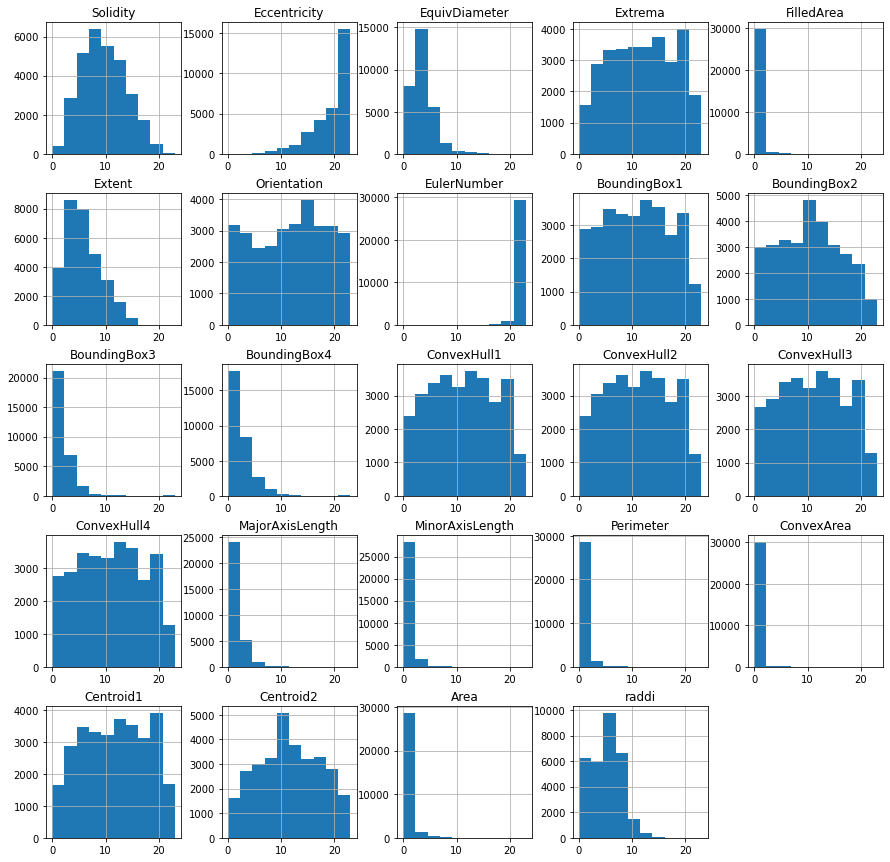

In [6]:
#Ploting a histogram of all the predictors
microbes.hist(figsize = (15,15))

In [7]:
#Labeling encoding the target classes
le = LabelEncoder()
microbes['microbe_class'] = le.fit_transform(microbes['microorganisms'])

In [8]:
microbes.microbe_class.unique()

array([6, 8, 3, 9, 5, 2, 0, 4, 1, 7])

In [9]:
microbes.dtypes

Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
microbe_class        int32
dtype: object

In [10]:
y = microbes["microbe_class"]
X = microbes.drop(["microbe_class","microorganisms"], axis = 1)

In [11]:
#checking to see if i split the the predictors from the target properly
X

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.49,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.99,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.90,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,20.10,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,19.20,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15


In [12]:
y

0        6
1        6
2        6
3        6
4        6
        ..
30522    7
30523    7
30524    7
30525    7
30526    7
Name: microbe_class, Length: 30527, dtype: int32

In [13]:
#Scaling the data for use in the network
scaler = StandardScaler()
Xcopy = X
X = scaler.fit_transform(X)

In [14]:
X

array([[ 0.25157842, -1.05378232,  0.81266517, ...,  0.09573016,
         0.43336914,  0.98939409],
       [-1.00353717, -0.33534429,  0.22916979, ...,  1.58681604,
        -0.03227932,  0.98939409],
       [-0.33414219,  0.09571853,  0.45080757, ..., -0.00952296,
         0.12834804,  0.98939409],
       ...,
       [-0.11511221,  0.92910664, -0.70713674, ...,  0.00801923,
        -0.5167246 ,  0.68994516],
       [-0.36121331,  0.90036912, -0.79760114, ...,  1.55173167,
        -0.54748303,  0.68994516],
       [-0.7648191 ,  0.44056878, -0.67999742, ...,  1.20088793,
        -0.50818059,  0.68994516]])

In [15]:
#Dividing the data into traning and test data
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [16]:

train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

In [17]:
np.unique(train_y)

array([0., 1.], dtype=float32)

In [18]:
#Building the structure of the model
model = keras.Sequential([
    layers.Dense(256, activation = 'relu', input_shape = [24]),
    layers.Dropout(.2),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(.2),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(.2),
    layers.Dense(10, activation = 'softmax'),
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6400      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

In [20]:
#Adding methods for optimizing and evaluating the model
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = "adam",
  metrics = ('accuracy')
)

Epoch 1/200
114/114 [==============================] - 1s 8ms/step - loss: 1.6619 - accuracy: 0.4108 - val_loss: 1.3619 - val_accuracy: 0.5175
Epoch 2/200
114/114 [==============================] - 1s 4ms/step - loss: 1.3537 - accuracy: 0.5234 - val_loss: 1.2154 - val_accuracy: 0.5770
Epoch 3/200
114/114 [==============================] - 0s 3ms/step - loss: 1.2322 - accuracy: 0.5681 - val_loss: 1.1260 - val_accuracy: 0.5989
Epoch 4/200
114/114 [==============================] - 1s 4ms/step - loss: 1.1528 - accuracy: 0.5944 - val_loss: 1.0250 - val_accuracy: 0.6384
Epoch 5/200
114/114 [==============================] - 1s 5ms/step - loss: 1.0846 - accuracy: 0.6173 - val_loss: 0.9700 - val_accuracy: 0.6615
Epoch 6/200
114/114 [==============================] - 1s 4ms/step - loss: 1.0318 - accuracy: 0.6369 - val_loss: 0.9178 - val_accuracy: 0.6695
Epoch 7/200
114/114 [==============================] - 0s 4ms/step - loss: 0.9887 - accuracy: 0.6502 - val_loss: 0.8917 - val_accuracy: 0.6790

Epoch 58/200
114/114 [==============================] - 1s 5ms/step - loss: 0.2894 - accuracy: 0.8999 - val_loss: 0.1796 - val_accuracy: 0.9496
Epoch 59/200
114/114 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.9035 - val_loss: 0.1727 - val_accuracy: 0.9489
Epoch 60/200
114/114 [==============================] - 0s 4ms/step - loss: 0.2704 - accuracy: 0.9061 - val_loss: 0.1709 - val_accuracy: 0.9528
Epoch 61/200
114/114 [==============================] - 1s 5ms/step - loss: 0.2765 - accuracy: 0.9048 - val_loss: 0.1680 - val_accuracy: 0.9532
Epoch 62/200
114/114 [==============================] - 1s 5ms/step - loss: 0.2766 - accuracy: 0.9048 - val_loss: 0.1775 - val_accuracy: 0.9497
Epoch 63/200
114/114 [==============================] - 1s 5ms/step - loss: 0.2717 - accuracy: 0.9064 - val_loss: 0.1638 - val_accuracy: 0.9528
Epoch 64/200
114/114 [==============================] - 1s 5ms/step - loss: 0.2669 - accuracy: 0.9089 - val_loss: 0.1592 - val_accuracy:

<AxesSubplot:title={'center':'Accuracy'}>

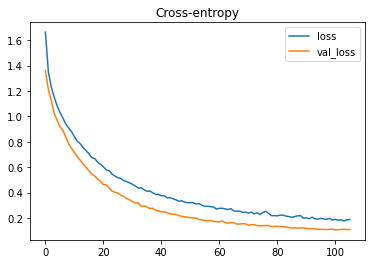

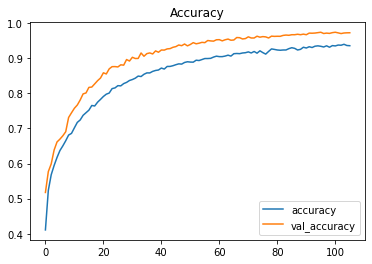

In [21]:
#Adding a callback that will stop the model at best values.
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
#Training the model
history = model.fit(
    train_X, train_y,
    validation_data=(test_X, test_y),
    batch_size=216,
    epochs=200,
    callbacks=[early_stopping],
)
#Plotting the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [22]:
 Xcopy.iloc[0, 0:24]

Solidity           10.700
Eccentricity       15.800
EquivDiameter       5.430
Extrema             3.750
FilledArea          0.785
Extent              8.140
Orientation         2.150
EulerNumber        22.300
BoundingBox1        2.970
BoundingBox2       10.900
BoundingBox3        1.750
BoundingBox4        2.970
ConvexHull1         3.120
ConvexHull2         3.120
ConvexHull3         2.970
ConvexHull4         2.970
MajorAxisLength     1.340
MinorAxisLength     1.610
Perimeter           0.683
ConvexArea          0.195
Centroid1           3.630
Centroid2          12.100
Area                1.310
raddi               7.990
Name: 0, dtype: float64